Import the library

In [4]:
import pyvinecopulib as pv
import numpy as np

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1       90 3.00, 2.00 2.0 -0.80 
   1    2                  2, 1                             c, c    BB1       90 3.00, 2.00 2.0 -0.80 
   2    1                  3, 2                      1      c, c    BB1       90 3.00, 2.00 2.0 -0.80 

[[1 1 1]
 [2 2 0]
 [3 0 0]]
[[1 1 1]
 [2 2 0]
 [3 0 0]]


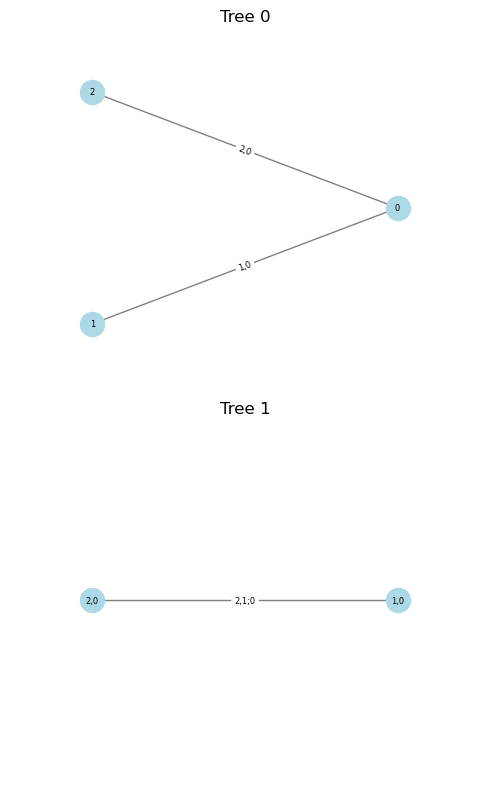

In [5]:
# Specify pair-copulas
bicop = pv.Bicop(pv.BicopFamily.bb1, 90, parameters=np.array([[3.0], [2.0]]))
pcs = [[bicop, bicop], [bicop]]

# Specify R-vine matrix
mat = np.array([[1, 1, 1], [2, 2, 0], [3, 0, 0]])

# Set-up a vine copula
cop = pv.Vinecop.from_structure_or_matrix(matrix=mat, pair_copulas=pcs)
print(cop)
cop.plot()

Showcase some methods

In [6]:
u = cop.simulate(n=10, seeds=[1, 2, 3])
fcts = [
  cop.pdf,
  cop.rosenblatt,
  cop.inverse_rosenblatt,
  cop.loglik,
  cop.aic,
  cop.bic,
]
[f(u) for f in fcts]

[array([ 44.67583001,  54.34974545,  29.84989695,  19.18643731,
        199.72159236, 944.18332674,  21.78049474,  43.78532554,
          9.10911159,  13.39339764]),
 array([[0.1638618 , 0.8170847 , 0.12668051],
        [0.90118677, 0.11345478, 0.2222099 ],
        [0.62193432, 0.12286857, 0.39604429],
        [0.6902412 , 0.78638305, 0.37455509],
        [0.13685699, 0.10872534, 0.2777274 ],
        [0.03952828, 0.35645124, 0.06597532],
        [0.48023317, 0.77472657, 0.72886036],
        [0.19787956, 0.90877192, 0.60171   ],
        [0.85523898, 0.76413881, 0.04961411],
        [0.17627362, 0.77807695, 0.03875948]]),
 array([[0.1638618 , 0.8728502 , 0.79397093],
        [0.90118677, 0.03148971, 0.30865931],
        [0.62193432, 0.28213894, 0.46366853],
        [0.6902412 , 0.28590505, 0.30879851],
        [0.13685699, 0.88594611, 0.84611164],
        [0.03952828, 0.97430917, 0.95100319],
        [0.48023317, 0.53494551, 0.47865733],
        [0.19787956, 0.84458738, 0.75111263],
    

Create a vine copula model

Different ways to fit a copula (when the families and structure are known)...

In [7]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Define first an object to control the fits:
#    - pv.FitControlsVinecop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsVinecop) for more details
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.bb1])
print(controls)

# Create a new object an select family and parameters by fitting to data
cop2 = pv.Vinecop.from_structure_or_matrix(matrix=mat, pair_copulas=pcs)
cop2.select(data=u, controls=controls)
print(cop2)

# Otherwise, create directly from data
cop2 = pv.Vinecop.from_data(data=u, matrix=mat, controls=controls)
print(cop2)

<pyvinecopulib.FitControlsVinecop>
Family set: BB1
Parametric method: mle
Nonparametric method: constant
Nonparametric multiplier: 1
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Truncation level: none (default)
Tree criterion: tau
Threshold: 0
Select truncation level: no
Select threshold: no
Select families: yes
Show trace: no
Number of threads: 1
MST algorithm: prim

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  3, 1                             c, c    BB1       90 2.93, 2.02 2.0 -0.80 
   1    2                  2, 1                             c, c    BB1       90 2.98, 2.04 2.0 -0.80 
   2    1                  3, 2                      1      c, c    BB1       90 2.73, 2.04 2.0 -0.79 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_typ

When nothing is known, there are also two ways to fit a copula...

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 2.98, 2.04 2.0 -0.80 
   1    2                  1, 3                             c, c    BB6       90 1.54, 3.96 2.0 -0.81 
   2    1                  2, 3                      1      c, c    BB1      270 2.44, 2.09 2.0 -0.78 

<pyvinecopulib.Vinecop> Vinecop model with 3 variables
tree edge conditioned variables conditioning variables var_types family rotation parameters  df   tau 
   1    1                  2, 1                             c, c    BB1       90 2.98, 2.04 2.0 -0.80 
   1    2                  1, 3                             c, c    BB6       90 1.54, 3.96 2.0 -0.81 
   2    1                  2, 3                      1      c, c    BB1      270 2.44, 2.09 2.0 -0.78 

[[1 3 3]
 [3 1 0]
 [2 0 0]]
[[1 3 3]
 [3 1 0]
 [2 0 0]]


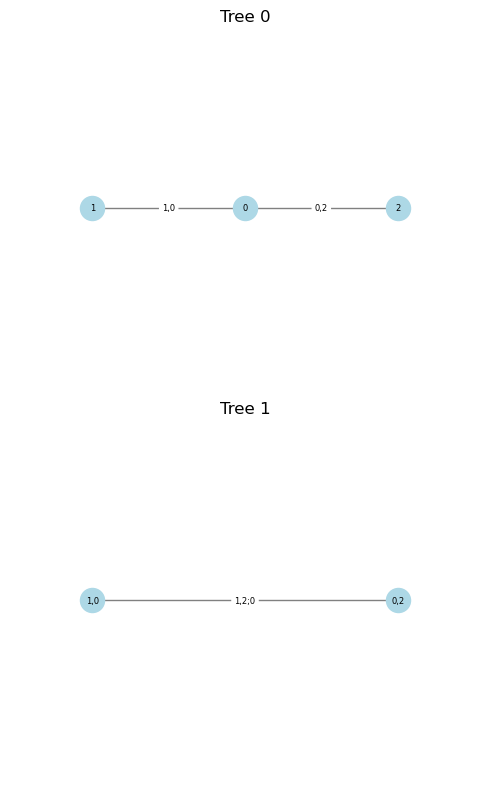

In [8]:
# Create a new object and select strucutre, family, and parameters
cop3 = pv.Vinecop(d=3)
cop3.select(data=u)
print(cop3)

# Otherwise, create directly from data
cop3 = pv.Vinecop.from_data(data=u)
print(cop3)
cop3.plot()

In [9]:
# create a C-vine structure with root node 1 in first tree, 2 in second, ...
cvine = pv.CVineStructure([4, 3, 2, 1])
# specify pair-copulas in every tree
tree1 = [
  pv.Bicop(pv.BicopFamily.gaussian, 0, [0.5]),
  pv.Bicop(pv.BicopFamily.clayton, 0, [3]),
  pv.Bicop(pv.BicopFamily.student, 0, [0.4, 4]),
]
tree2 = [
  pv.Bicop(pv.BicopFamily.indep),
  pv.Bicop(pv.BicopFamily.gaussian, 0, [0.5]),
]
tree3 = [pv.Bicop(pv.BicopFamily.gaussian)]

# instantiate C-vine copula model
cop = pv.Vinecop(cvine, [tree1, tree2, tree3])
print(cop)
cop.plot()

TypeError: __init__(): incompatible function arguments. The following argument types are supported:
    1. __init__(self, family: pyvinecopulib.BicopFamily = BicopFamily.indep, rotation: int = 0, parameters: numpy.ndarray[dtype=float64, shape=(*, *)] = array([], shape=(0, 0), dtype=float64), var_types: collections.abc.Sequence[str] = ['c', 'c']) -> None

Invoked with types: pyvinecopulib.Bicop, pyvinecopulib.BicopFamily, int, list